<a href="https://colab.research.google.com/github/groda/big_data/blob/master/Hadoop_minicluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/groda/big_data"><div><img src="https://github.com/groda/big_data/blob/master/logo_bdb.png?raw=true" align=right width="90"></div></a>

# Hadoop MiniCluster
<br>
<br>

The Hadoop MiniCluster is a lightweight, single-node Hadoop cluster that is primarily used for testing and development purposes. It provides a way to simulate a distributed Hadoop environment on a single machine, allowing developers to experiment with and test their Hadoop applications without the need for a full-scale, multi-node cluster.

Quote from [the official Hadoop documentation](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/CLIMiniCluster.html):


> *Using the CLI MiniCluster, users can simply start and stop a single-node Hadoop cluster with a single command, and without the need to set any environment variables or manage configuration files. The CLI MiniCluster starts both a YARN/MapReduce & HDFS clusters.*


In this notebook we download the Hadoop core and guide you through the steps required to launch the MiniCluster.

In [1]:
# @title
from IPython.core.display import HTML
HTML("""
<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>
  <b>Note:</b>
While the MiniCluster is useful for many development and testing scenarios, it's important to note that it does not fully replicate the complexities and challenges of a true multi-node Hadoop cluster. For production-scale testing or performance evaluations, a larger, more representative cluster setup is recommended.
</div>
""")

## About this tutorial

This tutorial dives deep to help you really get the hang of things, explaining every step in Big Data processing, even if it takes a bit of time, so just hang in there and be patient! 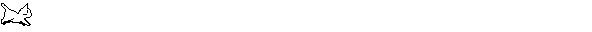

# Preamble

## Download Hadoop

In [2]:
import urllib.request
import os
import shutil
import tarfile
import logging
import subprocess
import time
import sys
############
# COSTANTS #
############

# URL for downloading Hadoop (archive site https://archive.apache.org/dist/)
HADOOP_URL = "https://archive.apache.org/dist/hadoop/core/hadoop-3.4.0/hadoop-3.4.0.tar.gz"

# logging level (should be one of: DEBUG, INFO, WARNING, ERROR, CRITICAL)
LOGGING_LEVEL = "INFO" #@param ["DEBUG", "INFO", "WARNING", "ERROR", "CRITICAL"]

# setup logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging_level = getattr(logging, LOGGING_LEVEL.upper(), 10)

logging.basicConfig(level=logging_level, \
                    format='%(asctime)s - %(levelname)s: %(message)s', \
                    datefmt='%d-%b-%y %I:%M:%S %p')

logger = logging.getLogger('my_logger')

JAVA_PATH = '/usr/lib/jvm/java-11-openjdk-amd64'

# true if running on Google Colab
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
 from google.colab import output

# setup logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

logging_level = getattr(logging, LOGGING_LEVEL.upper(), 10)

logging.basicConfig(level=logging_level, \
                    format='%(asctime)s - %(levelname)s: %(message)s', \
                    datefmt='%d-%b-%y %I:%M:%S %p')

logger = logging.getLogger('my_logger')

# set variable JAVA_HOME (install Java if necessary)
def is_java_installed():
    os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
    return os.environ['JAVA_HOME']

def install_java():
    # Uncomment and modify the desired version
    # java_version= 'openjdk-11-jre-headless'
    # java_version= 'default-jre'
    # java_version= 'openjdk-17-jre-headless'
    # java_version= 'openjdk-18-jre-headless'
    java_version= 'openjdk-19-jre-headless'

    print(f"Java not found. Installing {java_version} ... (this might take a while)")
    try:
        cmd = f"apt install -y {java_version}"
        subprocess_output = subprocess.run(cmd, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
        stdout_result = subprocess_output.stdout
        # Process the results as needed
        logger.info("Done installing Java {}".format(java_version))
        os.environ['JAVA_HOME'] = os.path.realpath(shutil.which("java")).split('/bin')[0]
        logger.info("JAVA_HOME is {}".format(os.environ['JAVA_HOME']))
    except subprocess.CalledProcessError as e:
        # Handle the error if the command returns a non-zero exit code
        logger.warn("Command failed with return code {}".format(e.returncode))
        logger.warn("stdout: {}".format(e.stdout))

# Install Java if not available
if is_java_installed():
    logger.info("Java is already installed: {}".format(os.environ['JAVA_HOME']))
else:
    logger.info("Installing Java")
    install_java()


# download Hadoop
file_name = os.path.basename(HADOOP_URL)
if os.path.isfile(file_name):
   logger.info("{} already exists, not downloading".format(file_name))
else:
  logger.info("Downloading {}".format(file_name))
  urllib.request.urlretrieve(HADOOP_URL, file_name)

# uncompress archive
dir_name = file_name[:-7]
if os.path.exists(dir_name):
  logger.info("{} is already uncompressed".format(file_name))
else:
  logger.info("Uncompressing {}".format(file_name))
  tar = tarfile.open(file_name)
  tar.extractall()
  tar.close()

# environment variables
os.environ['HADOOP_HOME'] = os.path.join(os.getcwd(), dir_name)
logger.info("HADOOP_HOME is {}".format(os.environ['HADOOP_HOME']))
os.environ['PATH'] = ':'.join([os.path.join(os.environ['HADOOP_HOME'], 'bin'), os.environ['PATH']])
logger.info("PATH is {}".format(os.environ['PATH']))


04-Aug-24 07:09:23 PM - INFO: Java is already installed: /usr/lib/jvm/java-11-openjdk-amd64
04-Aug-24 07:09:23 PM - INFO: Downloading hadoop-3.4.0.tar.gz
04-Aug-24 07:10:00 PM - INFO: Uncompressing hadoop-3.4.0.tar.gz
04-Aug-24 07:10:26 PM - INFO: HADOOP_HOME is /content/hadoop-3.4.0
04-Aug-24 07:10:26 PM - INFO: PATH is /content/hadoop-3.4.0/bin:/opt/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin


### Check environment variables used by `mapred`

The following steps are not needed but they might be useful to get familiar the `mapred` command.

`mapred minicluster` is the command that we are going to use to start the MiniCluster once a few variables and libraries are taken care of.

In [3]:
!mapred -h

Usage: mapred [OPTIONS] SUBCOMMAND [SUBCOMMAND OPTIONS]
 or    mapred [OPTIONS] CLASSNAME [CLASSNAME OPTIONS]
  where CLASSNAME is a user-provided Java class

  OPTIONS is none or any of:

--config dir   Hadoop config directory
--debug        turn on shell script debug mode
--help         usage information

  SUBCOMMAND is one of:


    Admin Commands:

frameworkuploader   mapreduce framework upload
hsadmin             job history server admin interface

    Client Commands:

classpath           prints the class path needed for running mapreduce subcommands
envvars             display computed Hadoop environment variables
job                 manipulate MapReduce jobs
minicluster         CLI MiniCluster
pipes               run a Pipes job
queue               get information regarding JobQueues
sampler             sampler
version             print the version

    Daemon Commands:

historyserver       run job history servers as a standalone daemon

SUBCOMMAND may print help when invoked 

In [4]:
!mapred envvars

JAVA_HOME='/usr/lib/jvm/java-11-openjdk-amd64'
HADOOP_MAPRED_HOME='/content/hadoop-3.4.0'
MAPRED_DIR='share/hadoop/mapreduce'
MAPRED_LIB_JARS_DIR='share/hadoop/mapreduce/lib'
HADOOP_CONF_DIR='/content/hadoop-3.4.0/etc/hadoop'
HADOOP_TOOLS_HOME='/content/hadoop-3.4.0'
HADOOP_TOOLS_DIR='share/hadoop/tools'
HADOOP_TOOLS_LIB_JARS_DIR='share/hadoop/tools/lib'


## Set `HADOOP_TOOLS_LIB_JARS_DIR`

This variable needs to point to the folder containing Hadoop libraries. As you can see in the output of `mapred envvars`, by default this is set incorrectly to `share/hadoop/tools/lib`.

In [5]:
os.environ['HADOOP_TOOLS_LIB_JARS_DIR'] = os.path.join(os.environ['HADOOP_HOME'], 'share/hadoop/tools/lib/') #IMPORTANT

## Install the `mockito` library

To figure out which version of `mockito` is compatible with the current version of Hadoop, check this page for library dependency analysis: https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-hdfs/dependency-analysis.html

We need Mockito 2.28.2.

After a new Hadoop installation, the mockito library is not yet there!

In [6]:
!find hadoop-3.4.0 -name "mockito*"

Download it from the Maven repository.

In [7]:
!wget --no-clobber https://repo1.maven.org/maven2/org/mockito/mockito-core/2.28.2/mockito-core-2.28.2.jar

--2024-08-04 19:10:27--  https://repo1.maven.org/maven2/org/mockito/mockito-core/2.28.2/mockito-core-2.28.2.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 591179 (577K) [application/java-archive]
Saving to: ‘mockito-core-2.28.2.jar’

mockito-core-2.28.2 100%[===================>] 577.32K  --.-KB/s    in 0.05s   

2024-08-04 19:10:27 (10.3 MB/s) - ‘mockito-core-2.28.2.jar’ saved [591179/591179]



Install the library in a location where it can be found.

In [8]:
shutil.copy('mockito-core-2.28.2.jar', os.path.join(os.environ['HADOOP_HOME'],'share/hadoop/mapreduce/'))

'/content/hadoop-3.4.0/share/hadoop/mapreduce/mockito-core-2.28.2.jar'

In [9]:
os.listdir(os.path.join(os.environ['HADOOP_HOME'],'share/hadoop/mapreduce/'))

['hadoop-mapreduce-client-core-3.4.0.jar',
 'sources',
 'hadoop-mapreduce-client-uploader-3.4.0.jar',
 'hadoop-mapreduce-client-jobclient-3.4.0.jar',
 'hadoop-mapreduce-client-shuffle-3.4.0.jar',
 'hadoop-mapreduce-client-common-3.4.0.jar',
 'mockito-core-2.28.2.jar',
 'hadoop-mapreduce-client-hs-3.4.0.jar',
 'hadoop-mapreduce-client-app-3.4.0.jar',
 'hadoop-mapreduce-client-jobclient-3.4.0-tests.jar',
 'hadoop-mapreduce-examples-3.4.0.jar',
 'hadoop-mapreduce-client-nativetask-3.4.0.jar',
 'hadoop-mapreduce-client-hs-plugins-3.4.0.jar',
 'jdiff']

## Create folders for the datanodes

These folders are needed for the correct functioning of the MiniCluster.

In [10]:
!mkdir -p ./target/test/data/dfs/{name-0-1,name-0-2}

In [11]:
!ls ./target/test/data/dfs/

name-0-1  name-0-2


# Start the MiniCluster


To see a full list of options run `mapred minicluster -help`.

In [12]:
!mapred minicluster -help

usage: ...
 -D <property=value>   Options to pass into configuration object
 -datanodes <arg>      How many datanodes to start (default 1)
 -format               Format the DFS (default false)
 -help                 Prints option help.
 -jhsport <arg>        JobHistoryServer port (default 0--we choose)
 -namenode <arg>       URL of the namenode (default is either the DFS
                       cluster or a temporary dir)
 -nnhttpport <arg>     NameNode HTTP port (default 0--we choose)
 -nnport <arg>         NameNode port (default 0--we choose)
 -nodemanagers <arg>   How many nodemanagers to start (default 1)
 -nodfs                Don't start a mini DFS cluster
 -nomr                 Don't start a mini MR cluster
 -rmport <arg>         ResourceManager port (default 0--we choose)
 -writeConfig <path>   Save configuration to this XML file.
 -writeDetails         Write basic information to this JSON file.


If you are not running this notebook for the first time or have edited the `core-site.xml` file you should now empty it to get the default initial configuration.

**Note:** the file `core-site.xml` needs to exist and contain the lines

```
<configuration>

</configuration>
```


In [13]:
# check if the file is there
!find $HADOOP_HOME -name "core-site.xml"

/content/hadoop-3.4.0/etc/hadoop/core-site.xml


In [14]:
# view the contents of the file
!cat $(find $HADOOP_HOME -name "core-site.xml")

<?xml version="1.0" encoding="UTF-8"?>
<?xml-stylesheet type="text/xsl" href="configuration.xsl"?>
<!--
  Licensed under the Apache License, Version 2.0 (the "License");
  you may not use this file except in compliance with the License.
  You may obtain a copy of the License at

    http://www.apache.org/licenses/LICENSE-2.0

  Unless required by applicable law or agreed to in writing, software
  distributed under the License is distributed on an "AS IS" BASIS,
  WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
  See the License for the specific language governing permissions and
  limitations under the License. See accompanying LICENSE file.
-->

<!-- Put site-specific property overrides in this file. -->

<configuration>
</configuration>


In [15]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("<configuration>\n</configuration>")

In [16]:
!cat $(find $HADOOP_HOME -name "core-site.xml")

<configuration>
</configuration>

## `mapred minicluster -format`

Finally, we are all set up to start the MiniCluster.

Make sure to include the `-format` option to initialize and format the filesystem.

Other than that, we are using the defaults for all the other options.


Note that this process runs forever thus blocking the notebook. In order to proceed with the rest of the notebook, just interrupt the running cell.

We'll see later how to run the MiniCluster as a subprocess without blocking the notebook's cells execution.

Uncomment the next cell to launch the MiniCluster!

In [17]:
#!mapred minicluster -format

If the MiniMRCluster started correctly, you should see a line like this at the bottom:

     2024-01-14 13:53:15,112 INFO mapreduce.MiniHadoopClusterManager: Started MiniMRCluster

# Stop the MiniCluster process

To continue to work with this notebook, you need to stop the MiniCluster by terminating the execution of the previous cell.

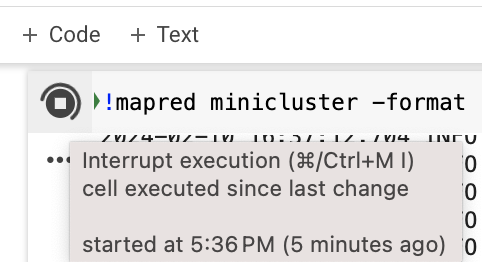

# Start the MiniCluster as a subprocess

It is convenient to start the MiniCluster as a subprocess in order prevent it from blocking the execution of other notebook cells.

The MiniCluster is a Java process with multiple listening ports.



## Use `lsof` to show listening ports

To check ports that have listening services use `lsof`.

The output should look like this:

```
COMMAND         PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node              7 root   21u  IPv6  19666      0t0  TCP *:8080 (LISTEN)
kernel_manager_  20 root    3u  IPv4  18322      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.  61 root    3u  IPv4  19763      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo  79 root    7u  IPv4  19989      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3         428 root   21u  IPv4  25506      0t0  TCP 127.0.0.1:38217 (LISTEN)
python3         467 root    3u  IPv4  26425      0t0  TCP 127.0.0.1:43729 (LISTEN)
python3         467 root    5u  IPv4  26426      0t0  TCP 127.0.0.1:60229 (LISTEN)
```

In [18]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND          PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node               7 root   21u  IPv6  20065      0t0  TCP *:8080 (LISTEN)
kernel_manager_   25 root    6u  IPv4  19487      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.   70 root    3u  IPv4  19330      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo   91 root    7u  IPv4  20298      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3         2301 root   21u  IPv4  84721      0t0  TCP 127.0.0.1:37185 (LISTEN)
python3         2340 root    3u  IPv4  86086      0t0  TCP 127.0.0.1:35717 (LISTEN)
python3         2340 root    5u  IPv4  86087      0t0  TCP 127.0.0.1:45663 (LISTEN)


Options used in `lsof`:

* `-i` specifies that you want to display only network files, that is open network connections
* `-n` and `-P` tell `lsof` to show IP addresses (`-n`) and ports (`-P`) in numeric form. This makes `lsof` faster as it saves the time for name lookups.
* the option `+c0` is used to show a longer substring of the name of the UNIX command associated with the process (https://linux.die.net/man/8/lsof)
* `-sTCP:LISTEN` filters for TCP connections in state `LISTEN`

See also [lsof and listening ports](https://unix.stackexchange.com/questions/26887/lsof-and-listening-ports) on Stackexchange.

## Start the subprocess

Start the MiniCluster as a subprocess using Python's [`subprocess` library](https://docs.python.org/3/library/subprocess.html).

The files `out.txt` and `err.txt` will contain respectively the standard output and the standard error emitted by the `mapred minicluster` command.

In [19]:
import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format"],
        stdout=stdout_file,
        stderr=stderr_file
    )

Wait for a couple of seconds because the services might not be available immediately.

In [20]:
if not IN_COLAB:
  time.sleep(30)
else:
  time.sleep(10)

Now check for listening ports again (you can also refresh the next cell with ctrl-enter).

In [21]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND          PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node               7 root   21u  IPv6  20065      0t0  TCP *:8080 (LISTEN)
kernel_manager_   25 root    6u  IPv4  19487      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.   70 root    3u  IPv4  19330      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo   91 root    7u  IPv4  20298      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3         2301 root   21u  IPv4  84721      0t0  TCP 127.0.0.1:37185 (LISTEN)
python3         2340 root    3u  IPv4  86086      0t0  TCP 127.0.0.1:35717 (LISTEN)
python3         2340 root    5u  IPv4  86087      0t0  TCP 127.0.0.1:45663 (LISTEN)
java            2805 root  341u  IPv4  98240      0t0  TCP 127.0.0.1:46505 (LISTEN)
java            2805 root  351u  IPv4  98317      0t0  TCP 127.0.0.1:44975 (LISTEN)
java            2805 root  361u  IPv4  98320      0t0  TCP 127.0.0.1:42669 (LISTEN)
java            2805 root  364u  IPv4 100111      0t0  TCP 127.0.0.1:44643 (LISTEN)
java            2805

You should have gotten something like this (a total of $18$ listening ports associated with the MiniCluster process):

```
COMMAND           PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node                6 root   21u  IPv6  17373      0t0  TCP *:8080 (LISTEN)
kernel_manager_    20 root    3u  IPv4  17180      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.    58 root    3u  IPv4  19499      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo    75 root    7u  IPv4  19658      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3          4081 root   21u  IPv4 108431      0t0  TCP 127.0.0.1:44519 (LISTEN)
python3          4108 root    3u  IPv4 109755      0t0  TCP 127.0.0.1:46699 (LISTEN)
python3          4108 root    5u  IPv4 109756      0t0  TCP 127.0.0.1:51813 (LISTEN)
java            17261 root  347u  IPv4 390097      0t0  TCP 127.0.0.1:38817 (LISTEN)
java            17261 root  357u  IPv4 391184      0t0  TCP 127.0.0.1:41631 (LISTEN)
java            17261 root  367u  IPv4 390801      0t0  TCP 127.0.0.1:34651 (LISTEN)
java            17261 root  370u  IPv4 390804      0t0  TCP 127.0.0.1:35015 (LISTEN)
java            17261 root  399u  IPv4 390814      0t0  TCP 127.0.0.1:46503 (LISTEN)
java            17261 root  400u  IPv4 390817      0t0  TCP 127.0.0.1:44665 (LISTEN)
java            17261 root  423u  IPv4 401418      0t0  TCP *:8031 (LISTEN)
java            17261 root  440u  IPv4 395796      0t0  TCP *:10033 (LISTEN)
java            17261 root  450u  IPv4 400174      0t0  TCP *:19888 (LISTEN)
java            17261 root  455u  IPv4 396244      0t0  TCP 127.0.0.1:43877 (LISTEN)
java            17261 root  465u  IPv4 400367      0t0  TCP *:8088 (LISTEN)
java            17261 root  470u  IPv4 400420      0t0  TCP *:8033 (LISTEN)
java            17261 root  490u  IPv4 401422      0t0  TCP *:8030 (LISTEN)
java            17261 root  500u  IPv4 400426      0t0  TCP 127.0.0.1:37335 (LISTEN)
java            17261 root  510u  IPv4 400470      0t0  TCP 127.0.0.1:42337 (LISTEN)
java            17261 root  520u  IPv4 401450      0t0  TCP 127.0.0.1:40401 (LISTEN)
java            17261 root  530u  IPv4 401454      0t0  TCP *:42359 (LISTEN)
java            17261 root  531u  IPv4 401457      0t0  TCP 127.0.0.1:38543 (LISTEN)
```

The `java` process is the one responsible for providing the MiniCluster services by listening on several ports.

There are two known ports for the Web interfaces (see [https://hadoop.apache.org/docs/.../ClusterSetup.html#Web_Interfaces](https://hadoop.apache.org/docs/r3.0.1/hadoop-project-dist/hadoop-common/ClusterSetup.html#Web_Interfaces)):
*  $8088$ the port to the ResourceManager
*  $19888$ the port to the MapReduce JobHistory Server



### Access the Web UI

Let us check the Web interface at port $8088$.

In [22]:
!wget http://localhost:8088

--2024-08-04 19:10:41--  http://localhost:8088/
Resolving localhost (localhost)... 127.0.0.1, ::1
Connecting to localhost (localhost)|127.0.0.1|:8088... failed: Connection refused.
Connecting to localhost (localhost)|::1|:8088... failed: Cannot assign requested address.
Retrying.

--2024-08-04 19:10:42--  (try: 2)  http://localhost:8088/
Connecting to localhost (localhost)|127.0.0.1|:8088... failed: Connection refused.
Connecting to localhost (localhost)|::1|:8088... failed: Cannot assign requested address.
Retrying.

--2024-08-04 19:10:44--  (try: 3)  http://localhost:8088/
Connecting to localhost (localhost)|127.0.0.1|:8088... failed: Connection refused.
Connecting to localhost (localhost)|::1|:8088... failed: Cannot assign requested address.
Retrying.

--2024-08-04 19:10:47--  (try: 4)  http://localhost:8088/
Connecting to localhost (localhost)|127.0.0.1|:8088... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:8088/cluster [following]
--2024-0

We can serve the ResourceManager UI in the browser through Google Colab.

In [23]:
if IN_COLAB:
    # serve the Web UI on Colab
    print("Click on the link below to open the Resource Manager Web UI 🚀")
    output.serve_kernel_port_as_window(8088, path='/node')

Click on the link below to open the Resource Manager Web UI 🚀


<IPython.core.display.Javascript object>

The port $19888$ is redirected to the same page as port $8088$, so it won't be very useful. I'm not sure if this is due to a missing configuration parameter or if it's a bug.

In [24]:
!wget http://localhost:19888

--2024-08-04 19:10:48--  http://localhost:19888/
Resolving localhost (localhost)... 127.0.0.1, ::1
Connecting to localhost (localhost)|127.0.0.1|:19888... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:19888/cluster [following]
--2024-08-04 19:10:48--  http://localhost:19888/cluster
Reusing existing connection to localhost:19888.
HTTP request sent, awaiting response... 200 OK
Length: 14065 (14K) [text/html]
Saving to: ‘index.html.1’

index.html.1        100%[===================>]  13.74K  --.-KB/s    in 0s      

2024-08-04 19:10:48 (104 MB/s) - ‘index.html.1’ saved [14065/14065]



In [25]:
if IN_COLAB:
    # serve the Web UI on Colab
    print("Click on the link below to open the MapReduce JobHistory Server Web UI 🚀")
    output.serve_kernel_port_as_window(19888, path='/node')

Click on the link below to open the MapReduce JobHistory Server Web UI 🚀


<IPython.core.display.Javascript object>

### Use ngrok to access the Web UI

In the free tier of Google Colab this functionality might not be available (see https://research.google.com/colaboratory/faq.html#limitations-and-restrictions). As an alternative, you can use [ngrok](https://ngrok.com/) after signing up for a free account.

Check the NGROK box below if you want to use ngrok.



In [26]:
# you should set this to True
NGROK = False #@param {type:"boolean"}

We are going to use the Python ngrok client `pyngrok` (see the [Colab example](https://pyngrok.readthedocs.io/en/latest/integrations.html#colab-http-example)).

In [27]:
if NGROK:
  !pip install pyngrok
  from pyngrok import ngrok, conf
  import getpass

  print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken")
  conf.get_default().auth_token = getpass.getpass()

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/get-started/your-authtoken
··········


After entering the ngrok authorization token, you can open a connection.

In [28]:
if NGROK:
  # Open a ngrok tunnel to the HTTP server
  public_url = ngrok.connect(19888).public_url

04-Aug-24 07:12:03 PM - INFO: Opening tunnel named: http-19888-9ba3fee7-3b4b-40cb-ad20-2d842c826538


04-Aug-24 07:12:04 PM - INFO: Overriding default auth token
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg="no configuration paths supplied"
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg="using configuration at default config path" path=/root/.config/ngrok/ngrok.yml
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg="client session established" obj=tunnels.session
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg="tunnel session started" obj=tunnels.session
04-Aug-24 07:12:04 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg=start pg=/api/tunnels id=1cc987793bc5e340
04-Aug-24 07:12:05 PM - INFO: t=2024-08-04T19:12:04+0000 lvl=info msg=en

In [29]:
if NGROK:
  print(f'Click on {public_url} to open the MapReduce JobHistory Server Web UI')

Click on https://3a1d-34-74-204-234.ngrok-free.app to open the MapReduce JobHistory Server Web UI


You can safely ignore the warning since we are not disclosing any confidential information and proceed with clicking on the "Visit site" button.

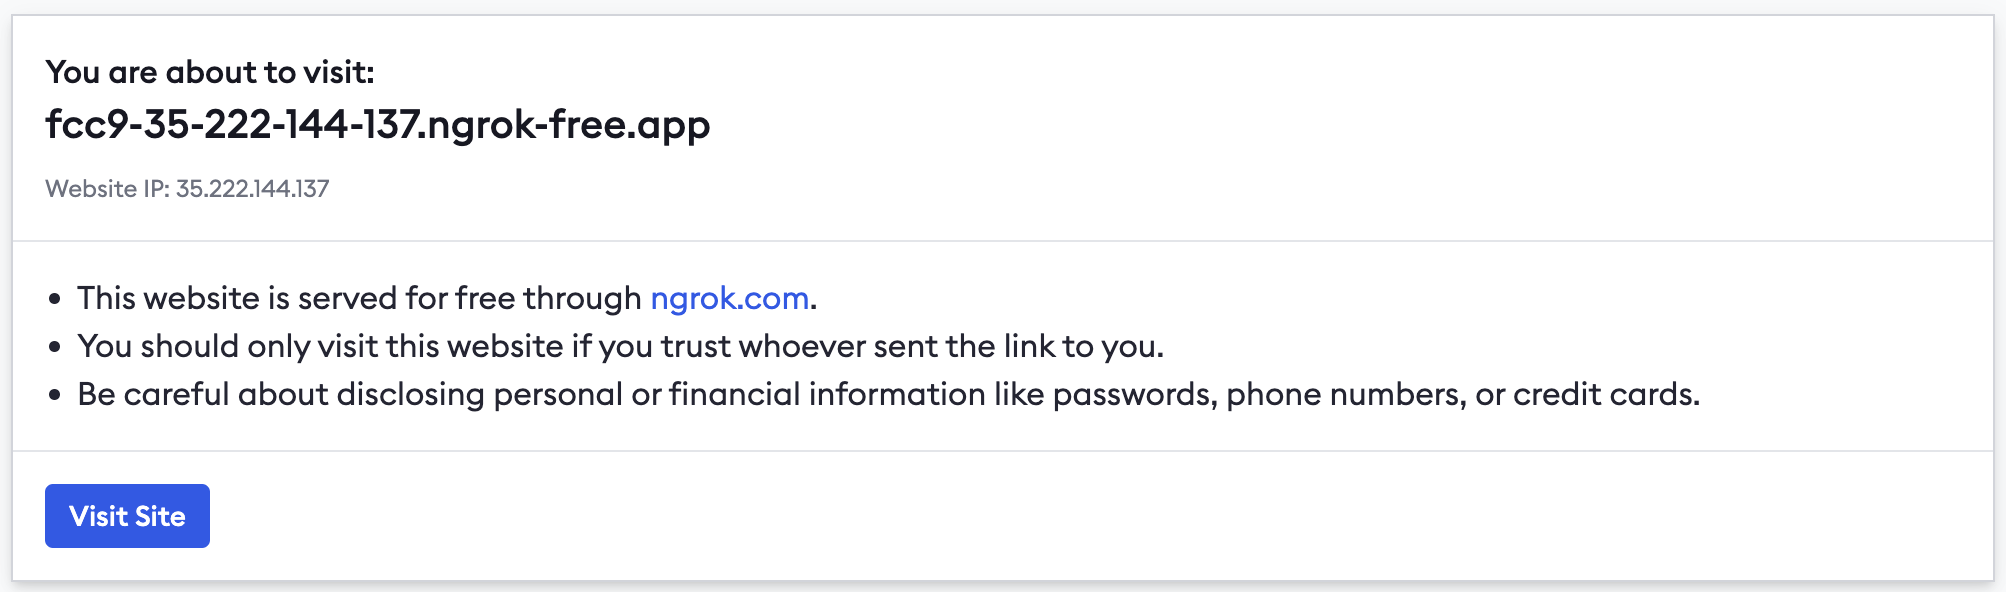

## Stop the MiniCluster subprocess

To stop the MiniCluster subprocess use `process.kill()` (remember: `process` is the variable name for the MiniCluster subprocess).

In [30]:
process.kill()

The Java process should now be gone.

In [31]:
!lsof -n -i -P +c0 -sTCP:LISTEN

COMMAND          PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
node               7 root   21u  IPv6  20065      0t0  TCP *:8080 (LISTEN)
kernel_manager_   25 root    6u  IPv4  19487      0t0  TCP 172.28.0.12:6000 (LISTEN)
colab-fileshim.   70 root    3u  IPv4  19330      0t0  TCP 127.0.0.1:3453 (LISTEN)
jupyter-noteboo   91 root    7u  IPv4  20298      0t0  TCP 172.28.0.12:9000 (LISTEN)
python3         2301 root   21u  IPv4  84721      0t0  TCP 127.0.0.1:37185 (LISTEN)
python3         2340 root    3u  IPv4  86086      0t0  TCP 127.0.0.1:35717 (LISTEN)
python3         2340 root    5u  IPv4  86087      0t0  TCP 127.0.0.1:45663 (LISTEN)
ngrok           3698 root    6u  IPv4 116605      0t0  TCP 127.0.0.1:4040 (LISTEN)


In case there are still some `java` processes lingering around, kill them with

In [32]:
!pkill -f java

Verify that the Java processes are gone.

# Start the MiniCluster with your own ports

This time we will also set the ports for various services:

    mapred minicluster -format -jhsport 8900 -nnhttpport 8901 -nnport 8902 -rmport 8903

Ports:

port number | description
--- | ---
8900 | JobHistoryServer port
8901 | NameNode HTTP port
8902 | NameNode port
8903 | ResourceManager port


**Note:** we chose these port numbers (8900, 8901, 8902, 8903) arbitrarily, you can pick other numbers as long as they do not conflict with ports that are already is use.

In [33]:
import subprocess
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format", "-jhsport", "8900", "-nnhttpport", "8901", "-nnport", "8902", "-rmport", "8903"],
        stdout=stdout_file,
        stderr=stderr_file
    )

In [34]:
if not IN_COLAB:
  time.sleep(30)
else:
  time.sleep(10)

04-Aug-24 07:12:10 PM - WARNING: t=2024-08-04T19:12:10+0000 lvl=warn msg="failed to open private leg" id=3f1ee8ca6795 privaddr=localhost:19888 err="dial tcp 127.0.0.1:19888: connect: connection refused"
04-Aug-24 07:12:10 PM - WARNING: t=2024-08-04T19:12:10+0000 lvl=warn msg="failed to open private leg" id=166fe8e39b26 privaddr=localhost:19888 err="dial tcp 127.0.0.1:19888: connect: connection refused"


List the Java ports. These should be all ports associated with the MIniCluster `java` process.

Note: `grep "^COMMAND\|java"` means "filter out the lines that begin with the string `COMMAND` or that contain the string `java`". This is to preserve the header line.

In [35]:
!lsof -n -i -P +c0 -sTCP:LISTEN | grep "^COMMAND\|java"

COMMAND          PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java            3727 root  341u  IPv4 119325      0t0  TCP 127.0.0.1:8901 (LISTEN)


You should now see

```
COMMAND           PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java            30246 root  347u  IPv4 671659      0t0  TCP 127.0.0.1:8901 (LISTEN)
java            30246 root  357u  IPv4 672029      0t0  TCP 127.0.0.1:8902 (LISTEN)
java            30246 root  367u  IPv4 674008      0t0  TCP 127.0.0.1:44721 (LISTEN)
java            30246 root  370u  IPv4 672082      0t0  TCP 127.0.0.1:36789 (LISTEN)
java            30246 root  399u  IPv4 674082      0t0  TCP 127.0.0.1:37975 (LISTEN)
java            30246 root  400u  IPv4 674085      0t0  TCP 127.0.0.1:37675 (LISTEN)
java            30246 root  423u  IPv4 681319      0t0  TCP *:8031 (LISTEN)
java            30246 root  440u  IPv4 680955      0t0  TCP *:10033 (LISTEN)
java            30246 root  450u  IPv4 681014      0t0  TCP *:19888 (LISTEN)
java            30246 root  455u  IPv4 681987      0t0  TCP 127.0.0.1:8900 (LISTEN)
java            30246 root  465u  IPv4 682035      0t0  TCP *:8088 (LISTEN)
java            30246 root  470u  IPv4 681313      0t0  TCP *:8033 (LISTEN)
java            30246 root  490u  IPv4 681325      0t0  TCP *:8030 (LISTEN)
java            30246 root  500u  IPv4 682046      0t0  TCP 127.0.0.1:8903 (LISTEN)
java            30246 root  510u  IPv4 681370      0t0  TCP 127.0.0.1:34521 (LISTEN)
java            30246 root  520u  IPv4 682057      0t0  TCP 127.0.0.1:36981 (LISTEN)
java            30246 root  530u  IPv4 681373      0t0  TCP *:46657 (LISTEN)
java            30246 root  531u  IPv4 682061      0t0  TCP 127.0.0.1:39897 (LISTEN)
```

Our ports $8900$, $8901$, $8902$, and $8903$ are included in the list.

The log messages are in the file `err.txt`. The last 10 lines should look like this:

```
2023-12-27 21:36:08,820 INFO server.MiniYARNCluster: All Node Managers connected in MiniYARNCluster
2023-12-27 21:36:08,820 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager address: localhost:8903
2023-12-27 21:36:08,821 INFO v2.MiniMRYarnCluster: MiniMRYARN ResourceManager web address: 0.0.0.0:8088
2023-12-27 21:36:08,821 INFO v2.MiniMRYarnCluster: MiniMRYARN HistoryServer address: localhost:8900
2023-12-27 21:36:08,822 INFO v2.MiniMRYarnCluster: MiniMRYARN HistoryServer web address: 26769af38ddc:19888
2023-12-27 21:36:08,823 INFO mapreduce.MiniHadoopClusterManager: Started MiniMRCluster
```

In [36]:
!tail err.txt

2024-08-04 19:12:16,167 INFO util.GSet: capacity      = 2^17 = 131072 entries
2024-08-04 19:12:16,183 INFO common.Storage: Lock on /content/target/test/data/dfs/name-0-1/in_use.lock acquired by nodename 3727@446a375b7fe4
2024-08-04 19:12:16,191 INFO common.Storage: Lock on /content/target/test/data/dfs/name-0-2/in_use.lock acquired by nodename 3727@446a375b7fe4
2024-08-04 19:12:16,195 INFO namenode.FileJournalManager: Recovering unfinalized segments in /content/target/test/data/dfs/name-0-1/current
2024-08-04 19:12:16,195 INFO namenode.FileJournalManager: Recovering unfinalized segments in /content/target/test/data/dfs/name-0-2/current
2024-08-04 19:12:16,195 INFO namenode.FSImage: No edit log streams selected.
2024-08-04 19:12:16,195 INFO namenode.FSImage: Planning to load image: FSImageFile(file=/content/target/test/data/dfs/name-0-1/current/fsimage_0000000000000000000, cpktTxId=0000000000000000000)
2024-08-04 19:12:16,348 INFO namenode.FSImageFormatPBINode: Loading 1 INodes.
2024-08

Check the NameNode's HTTP port.

In [37]:
!wget http://localhost:8901

--2024-08-04 19:12:16--  http://localhost:8901/
Resolving localhost (localhost)... 127.0.0.1, ::1
Connecting to localhost (localhost)|127.0.0.1|:8901... connected.
HTTP request sent, awaiting response... 302 Found
Location: http://localhost:8901/index.html [following]
--2024-08-04 19:12:16--  http://localhost:8901/index.html
Reusing existing connection to localhost:8901.
HTTP request sent, awaiting response... 200 OK
Length: 1079 (1.1K) [text/html]
Saving to: ‘index.html.2’

index.html.2        100%[===================>]   1.05K  --.-KB/s    in 0s      

2024-08-04 19:12:17 (117 MB/s) - ‘index.html.2’ saved [1079/1079]



## Start the NameNode Web UI

Serve the NameNode UI in the browser through Google Colab (path should be set to `/index.html` as in the output of `wget` otherwise the URL won't work).

In [38]:
if IN_COLAB and not NGROK:
    # serve the Web UI on Colab
    print("Click on the link below to open the NameNode Web UI 🚀")
    output.serve_kernel_port_as_window(8901, path='/index.html')
else:
  if NGROK:
    # disconnect previous tunnels (note: you can have max 3 tunnels open!)
    # see: https://pyngrok.readthedocs.io/en/latest/index.html#get-active-tunnels
    tunnels = ngrok.get_tunnels()
    for t in tunnels:
      ngrok.disconnect(t.public_url)
    # Open a ngrok tunnel to the HTTP server on port 8901
    public_url = ngrok.connect(8901).public_url
    print(f'Click on {public_url} to open the NameNode Web UI 🚀')

04-Aug-24 07:12:17 PM - INFO: t=2024-08-04T19:12:17+0000 lvl=info msg=start pg=/api/tunnels id=618f6ef4fc692b19
04-Aug-24 07:12:17 PM - INFO: t=2024-08-04T19:12:17+0000 lvl=info msg=end pg=/api/tunnels id=618f6ef4fc692b19 status=200 dur=265.638µs
04-Aug-24 07:12:17 PM - INFO: Disconnecting tunnel: https://3a1d-34-74-204-234.ngrok-free.app
04-Aug-24 07:12:17 PM - INFO: t=2024-08-04T19:12:17+0000 lvl=info msg=start pg=/api/tunnels/http-19888-9ba3fee7-3b4b-40cb-ad20-2d842c826538 id=26cf928d2ad02baa
04-Aug-24 07:12:17 PM - INFO: t=2024-08-04T19:12:17+0000 lvl=info msg=end pg=/api/tunnels/http-19888-9ba3fee7-3b4b-40cb-ad20-2d842c826538 id=26cf928d2ad02baa status=204 dur=36.380055ms
04-Aug-24 07:12:17 PM - INFO: t=2024-08-04T19:12:17+0000 lvl=info msg="failed to accept connection: Listener closed" obj=tunnels.session clientid=cf31c5d7baff4c19c11cf349a9ee2705
04-Aug-24 07:12:17 PM - WARNING: t=2024-08-04T19:12:17+0000 lvl=warn msg="Stopping forwarder" name=http-19888-9ba3fee7-3b4b-40cb-ad20-2

Click on https://f668-34-74-204-234.ngrok-free.app to open the NameNode Web UI 🚀


04-Aug-24 07:12:17 PM - INFO: t=2024-08-04T19:12:17+0000 lvl=info msg=end pg=/api/tunnels id=3d43722d46a8ba3a status=201 dur=46.18765ms


By clicking on the above link you should see the NameNode's Web UI in your browser:



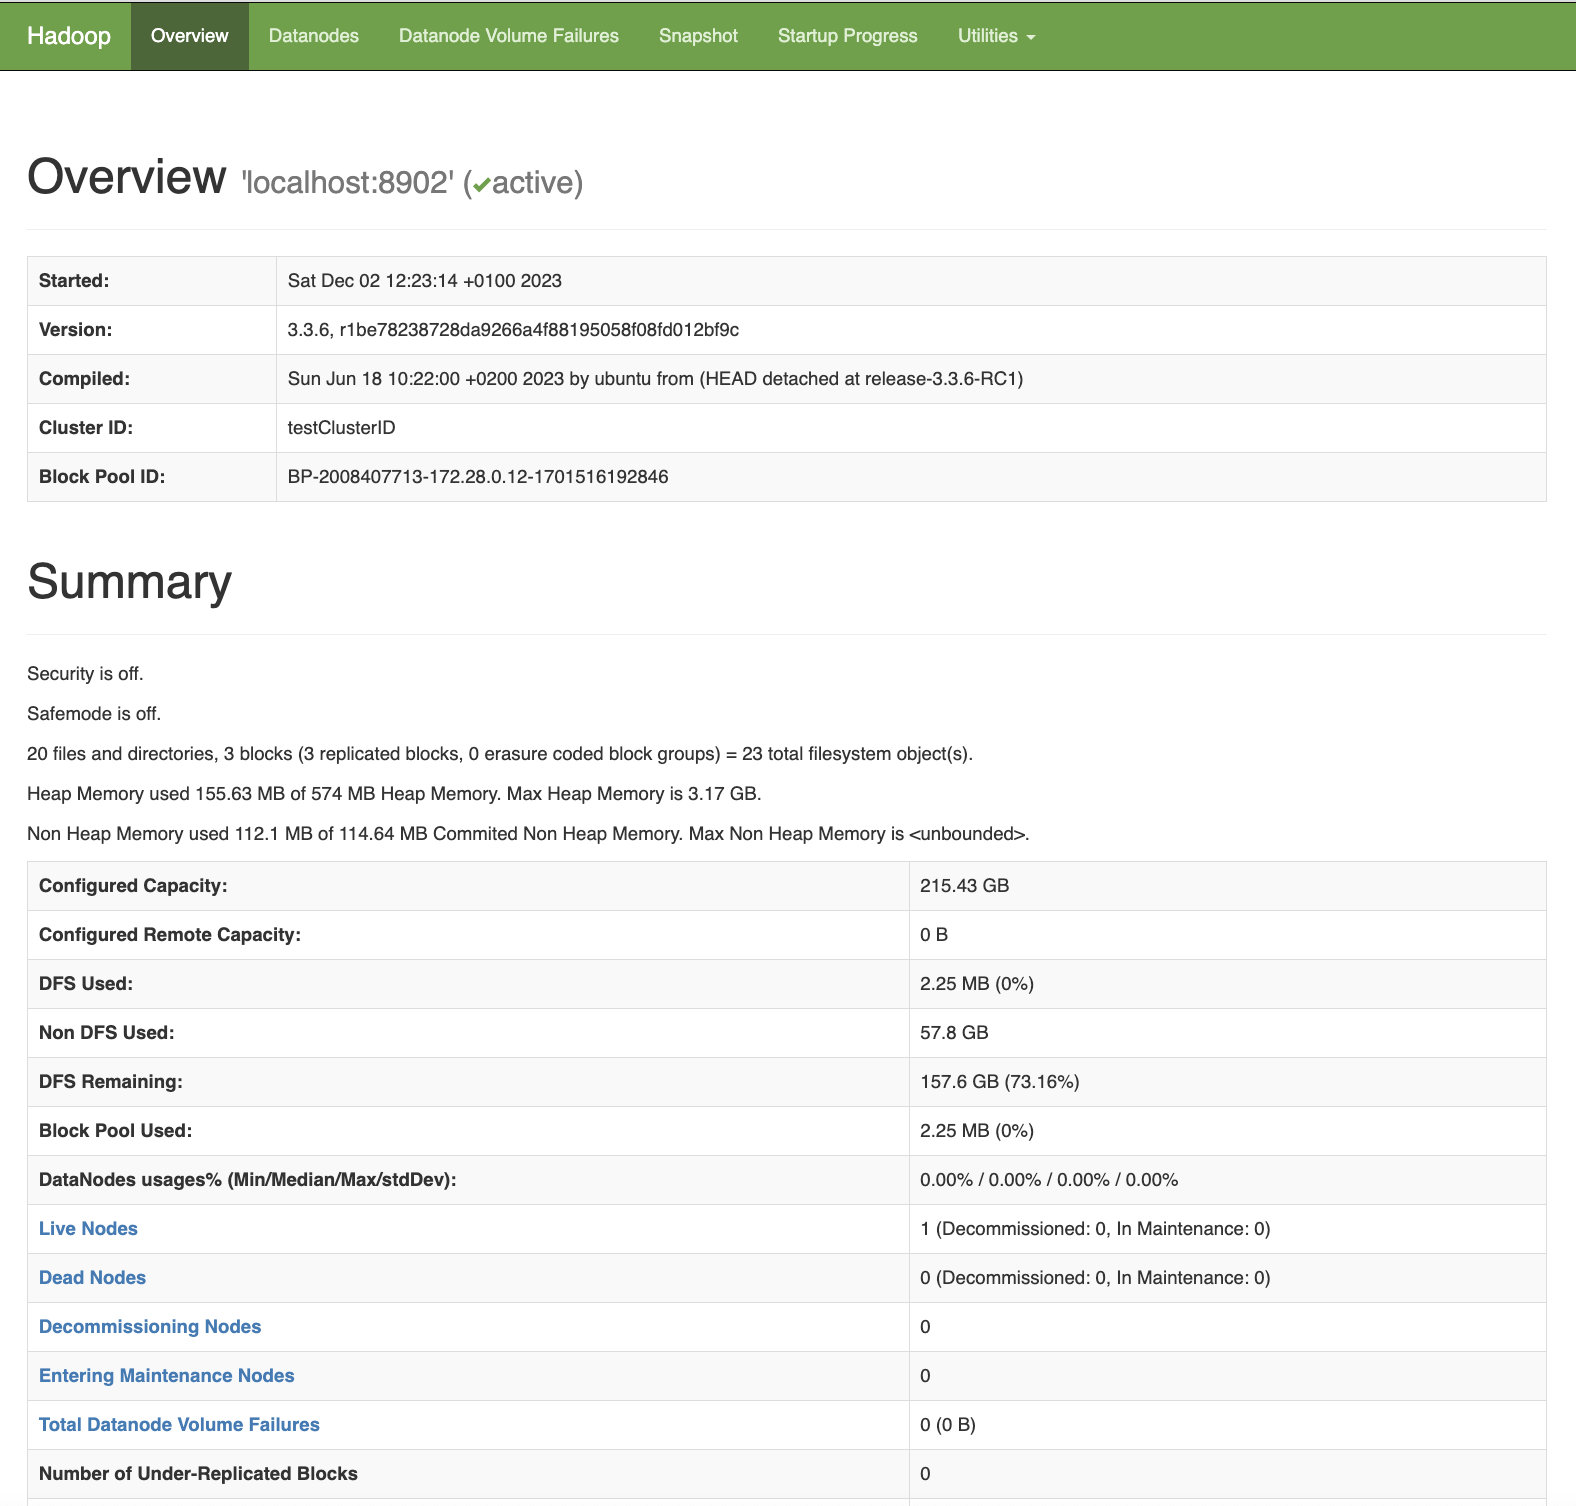

# Test the HDFS filesystem

## Create a directory

**Note:**  in order to use the MiniCluster's Hadoop filesystem you need to specify the full path prepending `hdfs://localhost:8902/` otherwise `hdfs` will write to the local filesystem.

In [39]:
%%bash
# create a folder my_dir
hdfs dfs -mkdir hdfs://localhost:8902/my_dir

List the contents of `my_dir` (should be empty).

In [40]:
!hdfs dfs -ls hdfs://localhost:8902/my_dir

Upload the local folder `sample_data` to `my_dir` on HDFS

In [41]:
!ls -lh sample_data

total 55M
-rwxr-xr-x 1 root root 1.7K Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root 295K Aug  1 13:24 california_housing_test.csv
-rw-r--r-- 1 root root 1.7M Aug  1 13:24 california_housing_train.csv
-rw-r--r-- 1 root root  18M Aug  1 13:24 mnist_test.csv
-rw-r--r-- 1 root root  35M Aug  1 13:24 mnist_train_small.csv
-rwxr-xr-x 1 root root  930 Jan  1  2000 README.md


Check the total size of the local folder `sample_data` using the command `du` ("du" stands for "disk usage" and the `-h` option stands for "human" as it will format file sizes in a “human-readable” fashion, e.g 55M instead of 55508) .

In [42]:
!du -h sample_data

55M	sample_data


Upload `sample_data` to HDFS.

In [43]:
!hdfs dfs -put sample_data hdfs://localhost:8902/my_dir/

Check

In [44]:
!hdfs dfs -ls hdfs://localhost:8902/my_dir

Found 1 items
drwxr-xr-x   - root supergroup          0 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data


Check the size of `my_dir` on HDFS using the [HDFS equivalent of `du`](https://hadoop.apache.org/docs/stable/hadoop-project-dist/hadoop-common/FileSystemShell.html#du).

In [45]:
!hdfs dfs -du -h hdfs://localhost:8902/my_dir

54.2 M  162.6 M  hdfs://localhost:8902/my_dir/sample_data


Check the contents of the HDFS folder `my_dir`

In [46]:
!hdfs dfs -ls -R -h hdfs://localhost:8902/my_dir

drwxr-xr-x   - root supergroup          0 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data
-rw-r--r--   3 root supergroup        930 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data/README.md
-rw-r--r--   3 root supergroup      1.7 K 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data/anscombe.json
-rw-r--r--   3 root supergroup    294.1 K 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data/california_housing_test.csv
-rw-r--r--   3 root supergroup      1.6 M 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data/california_housing_train.csv
-rw-r--r--   3 root supergroup     17.4 M 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data/mnist_test.csv
-rw-r--r--   3 root supergroup     34.8 M 2024-08-04 19:12 hdfs://localhost:8902/my_dir/sample_data/mnist_train_small.csv


You should now see in the Web interface that the "DFS used" has increased (you might need to refresh the NameNode UI Web page):

![dfs_used.png](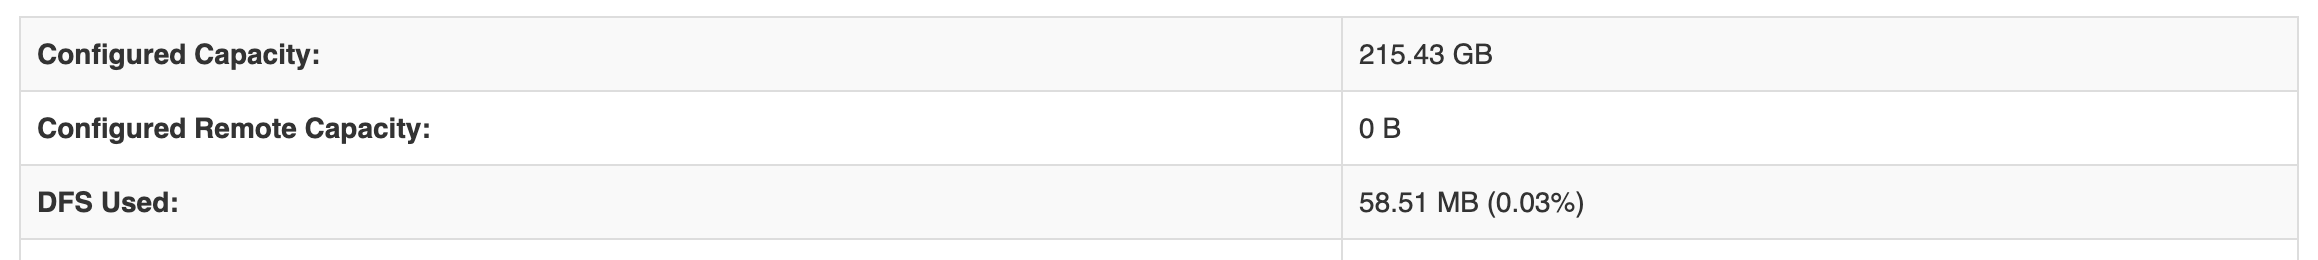
)

Remove the folder `my_dir`

In [47]:
!hdfs dfs -rm -r hdfs://localhost:8902/my_dir

Deleted hdfs://localhost:8902/my_dir


Now the DFS used should be back to ~$4$MB.


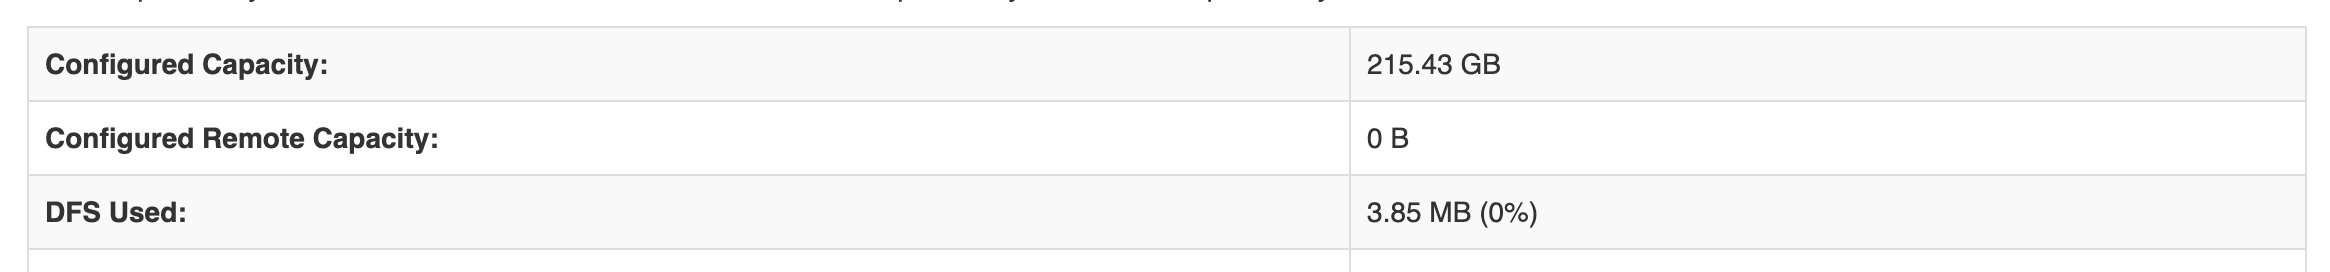


## The default filesystem

By default, `hdfs` will use the local filesystem so you need to prepend `hdfs://...` if you want to use the HDFS filesystem.

If you do not want to use the prefix `hdfs://localhost:8902/` in the filenames, you could set the property `fs.defaultFS` in `core-site.xml` or else use the option `-fs` like this:

    hdfs dfs -fs hdfs://localhost:8902/

In [48]:
!hdfs dfs -fs hdfs://localhost:8902/ -ls /

Found 2 items
drwxrwxrwx   - root supergroup          0 2024-08-04 19:12 /content
drwxr-xr-x   - root supergroup          0 2024-08-04 19:12 /user


This is the same as

In [49]:
!hdfs dfs -ls hdfs://localhost:8902/

Found 2 items
drwxrwxrwx   - root supergroup          0 2024-08-04 19:12 hdfs://localhost:8902/content
drwxr-xr-x   - root supergroup          0 2024-08-04 19:12 hdfs://localhost:8902/user


And also the same as

In [50]:
!hdfs dfs -D fs.defaultFS=hdfs://localhost:8902/ -ls /

Found 2 items
drwxrwxrwx   - root supergroup          0 2024-08-04 19:12 /content
drwxr-xr-x   - root supergroup          0 2024-08-04 19:12 /user


With the option `-D` we can set any variable on the fly (in this case we set `fs.defaultFS` to be the HDFS filesystem).

**Note:** the `-D` option should come before any other option.

If you configure the property `fs.defaultFS` in `core-site.xml`, you can also use `hdfs dfs -ls /`.

In [51]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("""<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>""")

In [52]:
!cat $HADOOP_HOME/etc/hadoop/core-site.xml

<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>

In [53]:
!hdfs dfs -ls /

Found 2 items
drwxrwxrwx   - root supergroup          0 2024-08-04 19:12 /content
drwxr-xr-x   - root supergroup          0 2024-08-04 19:12 /user


Let us set the local filesystem as default (`file:///` means the local filesystem `file://` and the extra slash `/` indicates the root folder).

In [54]:
with open(os.environ['HADOOP_HOME']+'/etc/hadoop/core-site.xml', 'w') as file:
  file.write("""
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>file:///</value>
  </property>
</configuration>""")

Now run `!hdfs dfs -ls /` as before. This time we are going to be listing the local filesystem and not the HDFS.

In [55]:
!hdfs dfs -ls /

Found 29 items
-rwxr-xr-x   1 root root          0 2024-08-04 18:59 /.dockerenv
-rw-r--r--   1 root root      17294 2023-11-10 04:55 /NGC-DL-CONTAINER-LICENSE
drwxr-xr-x   - root root      20480 2024-08-01 13:20 /bin
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /boot
drwxr-xr-x   - root root       4096 2024-08-04 19:12 /content
-rw-r--r--   1 root root       4332 2023-11-10 04:56 /cuda-keyring_1.0-1_all.deb
drwxr-xr-x   - root root       4096 2024-08-01 13:41 /datalab
drwxr-xr-x   - root root        360 2024-08-04 18:59 /dev
drwxr-xr-x   - root root       4096 2024-08-04 18:59 /etc
drwxr-xr-x   - root root       4096 2022-04-18 10:28 /home
drwxr-xr-x   - root root       4096 2024-08-04 18:59 /kaggle
drwxr-xr-x   - root root       4096 2024-08-01 13:20 /lib
drwxr-xr-x   - root root       4096 2024-08-01 13:16 /lib32
drwxr-xr-x   - root root       4096 2024-08-01 13:16 /lib64
drwxr-xr-x   - root root       4096 2023-10-04 02:08 /libx32
drwxr-xr-x   - root root       4096 2023-10-

I advise to get used to the fact that Hadoop interprets a file path as HDFS (`hdfs://`) vs. local (`file://`) depending on the setting of the variable `fs.defaultFS`, since this is often a source of confusion.

## Show status of HDFS with `hdfs dfsadmin`

The command `hdfs dfsadmin` allows to run administration tasks on the Hadoop filesystem.

In [56]:
!hdfs dfsadmin -h

h: Unknown command
Usage: hdfs dfsadmin
Note: Administrative commands can only be run as the HDFS superuser.
	[-report [-live] [-dead] [-decommissioning] [-enteringmaintenance] [-inmaintenance] [-slownodes]]
	[-safemode <enter | leave | get | wait | forceExit>]
	[-saveNamespace [-beforeShutdown]]
	[-rollEdits]
	[-restoreFailedStorage true|false|check]
	[-refreshNodes]
	[-setQuota <quota> <dirname>...<dirname>]
	[-clrQuota <dirname>...<dirname>]
	[-setSpaceQuota <quota> [-storageType <storagetype>] <dirname>...<dirname>]
	[-clrSpaceQuota [-storageType <storagetype>] <dirname>...<dirname>]
	[-finalizeUpgrade]
	[-rollingUpgrade [<query|prepare|finalize>]]
	[-upgrade <query | finalize>]
	[-refreshServiceAcl]
	[-refreshUserToGroupsMappings]
	[-refreshSuperUserGroupsConfiguration]
	[-refreshCallQueue]
	[-refresh <host:ipc_port> <key> [arg1..argn]
	[-reconfig <namenode|datanode> <host:ipc_port|livenodes> <start|status|properties>]
	[-printTopology]
	[-refreshNamenodes datanode_host:ipc_port]


The comand `hdfs dfsadmin -report` shows the current status of the Hadoop filesystem. In order to run it on our MiniCluster HDFS we need to pass the option

    -fs hdfs://localhost:8902/


    
Alternatively, we can configure the default filesystem (the URI of the namenode) in `core-site.xml` (see discussion in [The default filesystem)](#scrollTo=The_default_filesystem).

In [57]:
!hdfs dfsadmin -fs hdfs://localhost:8902/ -report

Configured Capacity: 231316381696 (215.43 GB)
Present Capacity: 159504314437 (148.55 GB)
DFS Remaining: 159501991936 (148.55 GB)
DFS Used: 2322501 (2.21 MB)
DFS Used%: 0.00%
Replicated Blocks:
	Under replicated blocks: 0
	Blocks with corrupt replicas: 0
	Missing blocks: 0
	Missing blocks (with replication factor 1): 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0
Erasure Coded Block Groups: 
	Low redundancy block groups: 0
	Block groups with corrupt internal blocks: 0
	Missing block groups: 0
	Low redundancy blocks with highest priority to recover: 0
	Pending deletion blocks: 0

-------------------------------------------------
Live datanodes (1):

Name: 127.0.0.1:39513 (localhost)
Hostname: 127.0.0.1
Decommission Status : Normal
Configured Capacity: 231316381696 (215.43 GB)
DFS Used: 2322501 (2.21 MB)
Non DFS Used: 71778512827 (66.85 GB)
DFS Remaining: 159501991936 (148.55 GB)
DFS Used%: 0.00%
DFS Remaining%: 68.95%
Configured Cache Capacity: 0

The information displayed by `hdfs dfsadmin` corresponds to what is presented in the [NameNode Web UI](#scrollTo=Start_the_NameNode_Web_UI).

# Test MapReduce

Find the MapReduce examples that come with the Hadoop distribution.

## Run the `pi` example

In [58]:
!find . -name "*examples*.jar"

./hadoop-3.4.0/share/hadoop/mapreduce/sources/hadoop-mapreduce-examples-3.4.0-test-sources.jar
./hadoop-3.4.0/share/hadoop/mapreduce/sources/hadoop-mapreduce-examples-3.4.0-sources.jar
./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar


Check if the cluster is still running, if not you will need to restart it! (from the cell cell [Configure the MiniCluster's ports](#scrollTo=Configure_the_MiniCluster_s_ports)).

In [59]:
!lsof -n -i -P +c0 -sTCP:LISTEN -ac java

COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    3727 root  341u  IPv4 119325      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    3727 root  346u  IPv4 120023      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    3727 root  361u  IPv4 120629      0t0  TCP 127.0.0.1:39513 (LISTEN)
java    3727 root  364u  IPv4 120632      0t0  TCP 127.0.0.1:39281 (LISTEN)
java    3727 root  393u  IPv4 122005      0t0  TCP 127.0.0.1:39089 (LISTEN)
java    3727 root  394u  IPv4 122019      0t0  TCP 127.0.0.1:39631 (LISTEN)
java    3727 root  416u  IPv4 125902      0t0  TCP *:8031 (LISTEN)
java    3727 root  434u  IPv4 125459      0t0  TCP *:10033 (LISTEN)
java    3727 root  444u  IPv4 130724      0t0  TCP *:19888 (LISTEN)
java    3727 root  445u  IPv4 130725      0t0  TCP *:8088 (LISTEN)
java    3727 root  454u  IPv4 130963      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    3727 root  464u  IPv4 131073      0t0  TCP *:8033 (LISTEN)
java    3727 root  484u  IPv4 132396      0t0  TCP *:8030 (LISTEN)
java    372

Here's ChatGPT 3.5's poem inspired by
`lsof -n -i -P +c0 -sTCP:LISTEN`:

In [60]:
# @title
from IPython.core.display import HTML
HTML("""
<div style="background-color:rgb(16, 163, 127,.2);border:2px solid rgb(16, 163, 127,.3);padding:3px;">
<svg fill="none" xmlns="http://www.w3.org/2000/svg" viewBox="0 0 320 320"  style="width:32px;height:32px;">
 <g fill="currentColor">
  <path d="m297.06 130.97c7.26-21.79 4.76-45.66-6.85-65.48-17.46-30.4-52.56-46.04-86.84-38.68-15.25-17.18-37.16-26.95-60.13-26.81-35.04-.08-66.13 22.48-76.91 55.82-22.51 4.61-41.94 18.7-53.31 38.67-17.59 30.32-13.58 68.54 9.92 94.54-7.26 21.79-4.76 45.66 6.85 65.48 17.46 30.4 52.56 46.04 86.84 38.68 15.24 17.18 37.16 26.95 60.13 26.8 35.06.09 66.16-22.49 76.94-55.86 22.51-4.61 41.94-18.7 53.31-38.67 17.57-30.32 13.55-68.51-9.94-94.51zm-120.28 168.11c-14.03.02-27.62-4.89-38.39-13.88.49-.26 1.34-.73 1.89-1.07l63.72-36.8c3.26-1.85 5.26-5.32 5.24-9.07v-89.83l26.93 15.55c.29.14.48.42.52.74v74.39c-.04 33.08-26.83 59.9-59.91 59.97zm-128.84-55.03c-7.03-12.14-9.56-26.37-7.15-40.18.47.28 1.3.79 1.89 1.13l63.72 36.8c3.23 1.89 7.23 1.89 10.47 0l77.79-44.92v31.1c.02.32-.13.63-.38.83l-64.41 37.19c-28.69 16.52-65.33 6.7-81.92-21.95zm-16.77-139.09c7-12.16 18.05-21.46 31.21-26.29 0 .55-.03 1.52-.03 2.2v73.61c-.02 3.74 1.98 7.21 5.23 9.06l77.79 44.91-26.93 15.55c-.27.18-.61.21-.91.08l-64.42-37.22c-28.63-16.58-38.45-53.21-21.95-81.89zm221.26 51.49-77.79-44.92 26.93-15.54c.27-.18.61-.21.91-.08l64.42 37.19c28.68 16.57 38.51 53.26 21.94 81.94-7.01 12.14-18.05 21.44-31.2 26.28v-75.81c.03-3.74-1.96-7.2-5.2-9.06zm26.8-40.34c-.47-.29-1.3-.79-1.89-1.13l-63.72-36.8c-3.23-1.89-7.23-1.89-10.47 0l-77.79 44.92v-31.1c-.02-.32.13-.63.38-.83l64.41-37.16c28.69-16.55 65.37-6.7 81.91 22 6.99 12.12 9.52 26.31 7.15 40.1zm-168.51 55.43-26.94-15.55c-.29-.14-.48-.42-.52-.74v-74.39c.02-33.12 26.89-59.96 60.01-59.94 14.01 0 27.57 4.92 38.34 13.88-.49.26-1.33.73-1.89 1.07l-63.72 36.8c-3.26 1.85-5.26 5.31-5.24 9.06l-.04 89.79zm14.63-31.54 34.65-20.01 34.65 20v40.01l-34.65 20-34.65-20z"></path>
  </svg>


<p>
In the realm of <span style="color: #00f;">networks</span>, where processes twine,<br>
A <code>command</code> unfolds, a <em>symphony</em> of lines.<br>
"<strong>Lsof</strong>," it whispers, with a mystic hum,<br>
A dance of flags, each one has its own drum.<br>
<p>
"<code>-n -i -P</code>," the conductor commands,<br>
Navigate swiftly, across distant lands.<br>
"<code>+c0</code>" echoes softly, a chorus of glee,<br>
Embrace all processes, as far as eyes can see.<br>
<p>
"<code>-sTCP:LISTEN</code>," a stanza profound,<br>
Seeking the echoes of ports, a network's sound.<br>
Processes in repose, in a state so keen,<br>
A tapestry of <span style="font-style: italic;">LISTEN</span>, a poetic scene.<br>
</div>
""")

Apart from this poetic digression, I consider `lsof` an exceptionally valuable command.

Use the following command to get the list of available examples in the jar file.

In [61]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar

An example program must be given as the first argument.
Valid program names are:
  aggregatewordcount: An Aggregate based map/reduce program that counts the words in the input files.
  aggregatewordhist: An Aggregate based map/reduce program that computes the histogram of the words in the input files.
  bbp: A map/reduce program that uses Bailey-Borwein-Plouffe to compute exact digits of Pi.
  dbcount: An example job that count the pageview counts from a database.
  distbbp: A map/reduce program that uses a BBP-type formula to compute exact bits of Pi.
  grep: A map/reduce program that counts the matches of a regex in the input.
  join: A job that effects a join over sorted, equally partitioned datasets
  multifilewc: A job that counts words from several files.
  pentomino: A map/reduce tile laying program to find solutions to pentomino problems.
  pi: A map/reduce program that estimates Pi using a quasi-Monte Carlo method.
  randomtextwriter: A map/reduce program that writes 10GB of r

Let us run the `pi` example (here we call it without arguments in order to get a usage message) through `yarn`.

In [62]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi

Usage: org.apache.hadoop.examples.QuasiMonteCarlo <nMaps> <nSamples>
Generic options supported are:
-conf <configuration file>        specify an application configuration file
-D <property=value>               define a value for a given property
-fs <file:///|hdfs://namenode:port> specify default filesystem URL to use, overrides 'fs.defaultFS' property from configurations.
-jt <local|resourcemanager:port>  specify a ResourceManager
-files <file1,...>                specify a comma-separated list of files to be copied to the map reduce cluster
-libjars <jar1,...>               specify a comma-separated list of jar files to be included in the classpath
-archives <archive1,...>          specify a comma-separated list of archives to be unarchived on the compute machines

The general command line syntax is:
command [genericOptions] [commandOptions]



The command takes `[genericOptions]` and `[commandOptions]`.

The command options are:

*   `nMaps`, the number of mappers
*   `nSamples`, the number of iterations per mapper


In [63]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi \
       5 1000

Number of Maps  = 5
Samples per Map = 1000
Wrote input for Map #0
Wrote input for Map #1
Wrote input for Map #2
Wrote input for Map #3
Wrote input for Map #4
Starting Job
2024-08-04 19:13:31,625 INFO impl.MetricsConfig: Loaded properties from hadoop-metrics2.properties
2024-08-04 19:13:31,799 INFO impl.MetricsSystemImpl: Scheduled Metric snapshot period at 10 second(s).
2024-08-04 19:13:31,799 INFO impl.MetricsSystemImpl: JobTracker metrics system started
2024-08-04 19:13:31,979 INFO input.FileInputFormat: Total input files to process : 5
2024-08-04 19:13:32,000 INFO mapreduce.JobSubmitter: number of splits:5
2024-08-04 19:13:32,402 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_local2011001580_0001
2024-08-04 19:13:32,402 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-08-04 19:13:32,687 INFO mapreduce.Job: The url to track the job: http://localhost:8080/
2024-08-04 19:13:32,688 INFO mapreduce.Job: Running job: job_local2011001580_0001
2024-08-04 19:13:32,699 

The job completed successfully, however it did not run on the MiniCluster because we did not specify the MiniCluster's Yarn Resource Manager address.


In fact, `yarn application -list` returns no apps (neither running nor finished).


In [64]:
!yarn application -D yarn.resourcemanager.address=localhost:8903 -list -appStates ALL

2024-08-04 19:13:37,808 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):0
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL


## Local configuration files

In order to be able to submit the job to the MiniCluster with YARN we need to edit three files:


*   `mapred-site.xml`
*   `core-site.xml`
*   `yarn-site.xml`

(see  https://hadoop.apache.org/docs/current/hadoop-project-dist/hadoop-common/SingleCluster.html#YARN_on_a_Single_Node)


In [65]:
file_mapred_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/mapred-site.xml')
file_core_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/core-site.xml')
file_yarn_site = os.path.join(os.environ['HADOOP_HOME'],'etc/hadoop/yarn-site.xml')

In [66]:
%%bash
cat > $HADOOP_HOME/'etc/hadoop/mapred-site.xml' << 🐸
<configuration>
    <property>
        <name>mapreduce.framework.name</name>
        <value>yarn</value>
    </property>
    <property>
        <name>mapreduce.application.classpath</name>
        <value>${HADOOP_HOME}/share/hadoop/mapreduce/*:${HADOOP_HOME}/share/hadoop/mapreduce/lib/*</value>
    </property>
</configuration>
🐸

In [67]:
!cat $HADOOP_HOME/'etc/hadoop/mapred-site.xml'

<configuration>
    <property>
        <name>mapreduce.framework.name</name>
        <value>yarn</value>
    </property>
    <property>
        <name>mapreduce.application.classpath</name>
        <value>/content/hadoop-3.4.0/share/hadoop/mapreduce/*:/content/hadoop-3.4.0/share/hadoop/mapreduce/lib/*</value>
    </property>
</configuration>


Set the default filesystem as the MiniCluster's filesystem in `core-site.xml`. This is necessary in order to allow YARN to save the applications logs to HDFS and this is why we create the directory `/tmp/logs` on HDFS.

In [68]:
with open(file_core_site, 'w') as file:
  file.write("""
<configuration>
  <property>
    <name>fs.defaultFS</name>
    <value>hdfs://localhost:8902/</value>
  </property>
</configuration>""")

Set `yarn.resourcemanager.address=localhost:8903` in `yarn-site.xml`.

In [69]:
with open(file_yarn_site, 'w') as file:
 file.write("""
<configuration>
<property>
    <name>yarn.resourcemanager.address</name>
    <value>localhost:8903</value>
</property>
<property>
    <name>yarn.log-aggregation-enable</name>
    <value>true</value>
</property>
</configuration>""")


It might be necessary at this point to re-start the cluster.

In [70]:
process.kill()
!pkill -f java # kill java processes

In [71]:
with open('out.txt', "w") as stdout_file, open('err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["mapred", "minicluster", "-format", "-jhsport", "8900", "-nnhttpport", "8901", "-nnport", "8902", "-rmport", "8903"],
        stdout=stdout_file,
        stderr=stderr_file
    )

Verify that the MiniCluster is running.

In [72]:
for att in range(10):
    with open('err.txt') as myfile:
         if 'Started MiniMRCluster' in myfile.read():
             print('MiniCluster is up and running')
             break
         else:
             time.sleep(2)


MiniCluster is up and running


In [73]:
!lsof -n -i -P +c0 -sTCP:LISTEN -ac java

COMMAND  PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
java    5488 root  341u  IPv4 149683      0t0  TCP 127.0.0.1:8901 (LISTEN)
java    5488 root  351u  IPv4 148854      0t0  TCP 127.0.0.1:8902 (LISTEN)
java    5488 root  361u  IPv4 148862      0t0  TCP 127.0.0.1:36547 (LISTEN)
java    5488 root  364u  IPv4 148865      0t0  TCP 127.0.0.1:40385 (LISTEN)
java    5488 root  393u  IPv4 150500      0t0  TCP 127.0.0.1:42681 (LISTEN)
java    5488 root  394u  IPv4 148903      0t0  TCP 127.0.0.1:34431 (LISTEN)
java    5488 root  420u  IPv4 158000      0t0  TCP *:8031 (LISTEN)
java    5488 root  434u  IPv4 154506      0t0  TCP *:10033 (LISTEN)
java    5488 root  444u  IPv4 157946      0t0  TCP *:19888 (LISTEN)
java    5488 root  446u  IPv4 154605      0t0  TCP *:8088 (LISTEN)
java    5488 root  454u  IPv4 157989      0t0  TCP 127.0.0.1:8900 (LISTEN)
java    5488 root  464u  IPv4 157995      0t0  TCP *:8033 (LISTEN)
java    5488 root  484u  IPv4 158005      0t0  TCP *:8030 (LISTEN)
java    548

Submit the app again. You should see at the very beginning of the output:

```
Connecting to ResourceManager at localhost/127.0.0.1:8903
```

This means that YARN has read its configuration file.

## Run the `pi` app on the MiniCluster with YARN

Let us run the job on the MiniCluster. 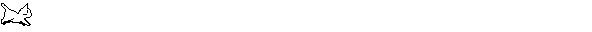



In [74]:
!yarn jar ./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar pi \
       5 1000

Number of Maps  = 5
Samples per Map = 1000


04-Aug-24 07:13:59 PM - INFO: t=2024-08-04T19:13:59+0000 lvl=info msg="join connections" obj=join id=4944f91c91d7 l=127.0.0.1:8901 r=[2a02:8388:6cc5:e800:70ee:91e:4517:7eea]:49611
04-Aug-24 07:14:00 PM - INFO: t=2024-08-04T19:14:00+0000 lvl=info msg="join connections" obj=join id=b6557ad3937b l=127.0.0.1:8901 r=[2a02:8388:6cc5:e800:70ee:91e:4517:7eea]:49611
04-Aug-24 07:14:00 PM - INFO: t=2024-08-04T19:14:00+0000 lvl=info msg="join connections" obj=join id=31c3ae28621f l=127.0.0.1:8901 r=[2a02:8388:6cc5:e800:70ee:91e:4517:7eea]:49620
04-Aug-24 07:14:00 PM - INFO: t=2024-08-04T19:14:00+0000 lvl=info msg="join connections" obj=join id=5aa288b19d68 l=127.0.0.1:8901 r=[2a02:8388:6cc5:e800:70ee:91e:4517:7eea]:49620
04-Aug-24 07:14:00 PM - INFO: t=2024-08-04T19:14:00+0000 lvl=info msg="join connections" obj=join id=ec278b8a4015 l=127.0.0.1:8901 r=[2a02:8388:6cc5:e800:70ee:91e:4517:7eea]:49620
04-Aug-24 07:14:00 PM - INFO: t=2024-08-04T19:14:00+0000 lvl=info msg="join connections" obj=join id

Wrote input for Map #0
Wrote input for Map #1
Wrote input for Map #2
Wrote input for Map #3
Wrote input for Map #4
Starting Job
2024-08-04 19:14:02,329 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903
2024-08-04 19:14:03,303 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1722798834650_0001
2024-08-04 19:14:03,915 INFO input.FileInputFormat: Total input files to process : 5
2024-08-04 19:14:04,481 INFO mapreduce.JobSubmitter: number of splits:5
2024-08-04 19:14:05,484 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1722798834650_0001
2024-08-04 19:14:05,485 INFO mapreduce.JobSubmitter: Executing with tokens: []
2024-08-04 19:14:06,493 INFO conf.Configuration: resource-types.xml not found
2024-08-04 19:14:06,503 INFO resource.ResourceUtils: Unable to find 'resource-types.xml'.
2024-08-04 19:14:07,764 INFO impl.YarnClientImpl: Submitted application applic

We can now see the finished app listed in the YARN resource manager (note that this time we do not need to specify the Resource Manager's address with the option `-D yarn.resourcemanager.address=localhost:8903`).

In [75]:
!yarn application -list -appStates ALL

2024-08-04 19:15:05,035 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):1
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1722798834650_0001	     QuasiMonteCarlo	           MAPREDUCE	      root	root.default	          FINISHED	         SUCCEEDED	           100%	http://446a375b7fe4:19888/jobhistory/job/job_1722798834650_0001


## Run the `pi` app in the background

Let us run the `pi` app in the background (as a subprocess) and with more mappers, so that it lasts longer and we are able to monitor its progress with the `yarn` command-line.

In [76]:
with open('job_out.txt', "w") as stdout_file, open('job_err.txt', "w") as stderr_file:
    process = subprocess.Popen(
        ["yarn", "jar", "./hadoop-3.4.0/share/hadoop/mapreduce/hadoop-mapreduce-examples-3.4.0.jar", "pi",
         "-D", "localhost:8903",
         "50", "1000000"],
        stdout=stdout_file,
        stderr=stderr_file
    )

In [77]:
time.sleep(10)

In [78]:
!yarn application -list -appStates ALL

2024-08-04 19:15:21,096 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1722798834650_0001	     QuasiMonteCarlo	           MAPREDUCE	      root	root.default	          FINISHED	         SUCCEEDED	           100%	http://446a375b7fe4:19888/jobhistory/job/job_1722798834650_0001
application_1722798834650_0002	     QuasiMonteCarlo	           MAPREDUCE	      root	root.default	          ACCEPTED	         UNDEFINED	             0%	                                N/A


If you do not see the newly submitted application in the YARN queue yet, give it some time and re-run the `yarn application -list` command! 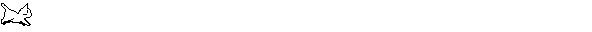



In [79]:
!yarn application -list -appStates ALL

2024-08-04 19:15:28,650 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1722798834650_0001	     QuasiMonteCarlo	           MAPREDUCE	      root	root.default	          FINISHED	         SUCCEEDED	           100%	http://446a375b7fe4:19888/jobhistory/job/job_1722798834650_0001
application_1722798834650_0002	     QuasiMonteCarlo	           MAPREDUCE	      root	root.default	          ACCEPTED	         UNDEFINED	             0%	                                N/A


You should now see something like this:
```
Total number of applications (application-types: [], states: [NEW, NEW_SAVING, SUBMITTED, ACCEPTED, RUNNING, FINISHED, FAILED, KILLED] and tags: []):2
                Application-Id	    Application-Name	    Application-Type	      User	     Queue	             State	       Final-State	       Progress	                       Tracking-URL
application_1707941943926_0001	     QuasiMonteCarlo	           MAPREDUCE	      root	   default	          FINISHED	         SUCCEEDED	           100%	http://c532258dcee8:19888/jobhistory/job/job_1707941943926_0001
application_1707941943926_0002	     QuasiMonteCarlo	           MAPREDUCE	      root	   default	           RUNNING	         UNDEFINED	          5.18%	             http://localhost:43121
```

The application in status `RUNNING` is the most recently submitted.

# View the logs of an application

To view the logs of a finished application use:

```
yarn logs -applicationID <your app ID>
```

For the sake of this demo, we are going to pick the id if the first successfully finished app with the following shell command:

In [80]:
!yarn application -list -appStates FINISHED 2>/dev/null|grep SUCCEEDED|tail -1| cut -f1

application_1722798834650_0001


View the logs for the selected application id (warning: it's a large file!).

In [81]:
%%bash
app_id=$(yarn application -list -appStates FINISHED 2>/dev/null|grep SUCCEEDED|tail -1| cut -f1)
yarn logs -applicationId $app_id

Container: container_1722798834650_0001_01_000004 on localhost_34535
LogAggregationType: AGGREGATED
LogType:directory.info
LogLastModifiedTime:Sun Aug 04 19:15:07 +0000 2024
LogLength:2101
LogContents:
ls -l:
total 32
-rw-r--r-- 1 root root  129 Aug  4 19:14 container_tokens
-rwx------ 1 root root  964 Aug  4 19:14 default_container_executor_session.sh
-rwx------ 1 root root 1019 Aug  4 19:14 default_container_executor.sh
lrwxrwxrwx 1 root root  179 Aug  4 19:14 job.jar -> /content/target/test/data/MiniHadoopClusterManager/yarn-857754/MiniHadoopClusterManager-localDir-nm-0_1/usercache/root/appcache/application_1722798834650_0001/filecache/11/job.jar
lrwxrwxrwx 1 root root  179 Aug  4 19:14 job.xml -> /content/target/test/data/MiniHadoopClusterManager/yarn-857754/MiniHadoopClusterManager-localDir-nm-0_1/usercache/root/appcache/application_1722798834650_0001/filecache/13/job.xml
-rwx------ 1 root root 8159 Aug  4 19:14 launch_container.sh
drwx--x--- 2 root root 4096 Aug  4 19:14 tmp
find

2024-08-04 19:15:45,913 INFO client.DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at localhost/127.0.0.1:8903
